Лабораторная работа 1
Разведочный анализ данных. Исследование и визуализация данных.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from sklearn.datasets import *

In [11]:
#Посмотрим на все данные ирисов
#from sklearn.datasets import load_iris
#data = load_iris()
#data.head()

AttributeError: head

In [3]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df = iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Выведем список колонок с типами данных

In [13]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

Сделаем проверку
1. Проверим наличие пустых значений
2. Цикл по колонкам датасета

In [14]:
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


Проверка данных для души
_____________________________________________________________________

In [15]:
type(iris)

sklearn.utils._bunch.Bunch

In [18]:
iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
iris.data.shape

(150, 4)

In [20]:
# Основные статистические характеристки набора данных
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# Основные статистические характеристки набора данных part 2
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
#Быстрый просмотр признаков
iris.data['sepal length (cm)'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

___________________________________________________________

### loc and iloc
Метод индекцации данных

In [28]:
df.loc[0:5, ['sepal length (cm)','petal width (cm)']]

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4


In [29]:
df.iloc[:,2:4].head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Задаём вопросы данным

Выведем всю информацию по критерию "длина чашелистика", которых больше 5.0

In [30]:
df[df['sepal length (cm)'] >= 5.0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
7,5.0,3.4,1.5,0.2,0.0
10,5.4,3.7,1.5,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Просмотрим, допустим, среднее занчение "высоту чашелистика", по предыдущему значению

In [31]:
df[df['sepal length (cm)'] >= 5.0]['sepal width (cm)'].mean()

3.05390625

### Визуальное исследование датасета
Настроим отображение графиков, добавим длину, высоту и пр

In [32]:
# Enable inline plots
%matplotlib inline

# Задание стиля графиков
sns.set(style="ticks")

# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [33]:
pd.set_option("display.width", 70)

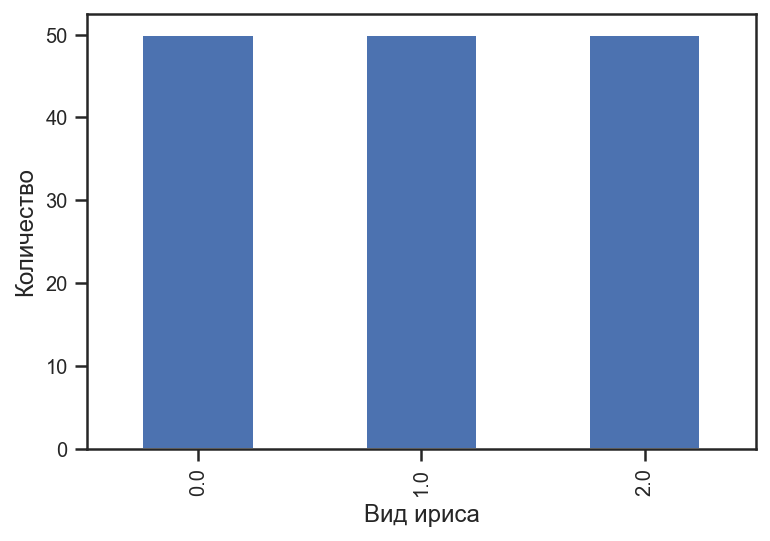

In [34]:
#Оценим наиболее распространённый вид ириса

count_full = df.groupby("target")["target"].count().sort_values()
count_full.plot(x="Вид ириса", y="Количество", kind="bar", fontsize=10)
plt.xlabel("Вид ириса")
plt.ylabel("Количество")
plt.show()

In [35]:
#видно, что все распространенны и того, каждого вида, по 50 цветков

# Диаграмма рассеяния для размеров чашелистика

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

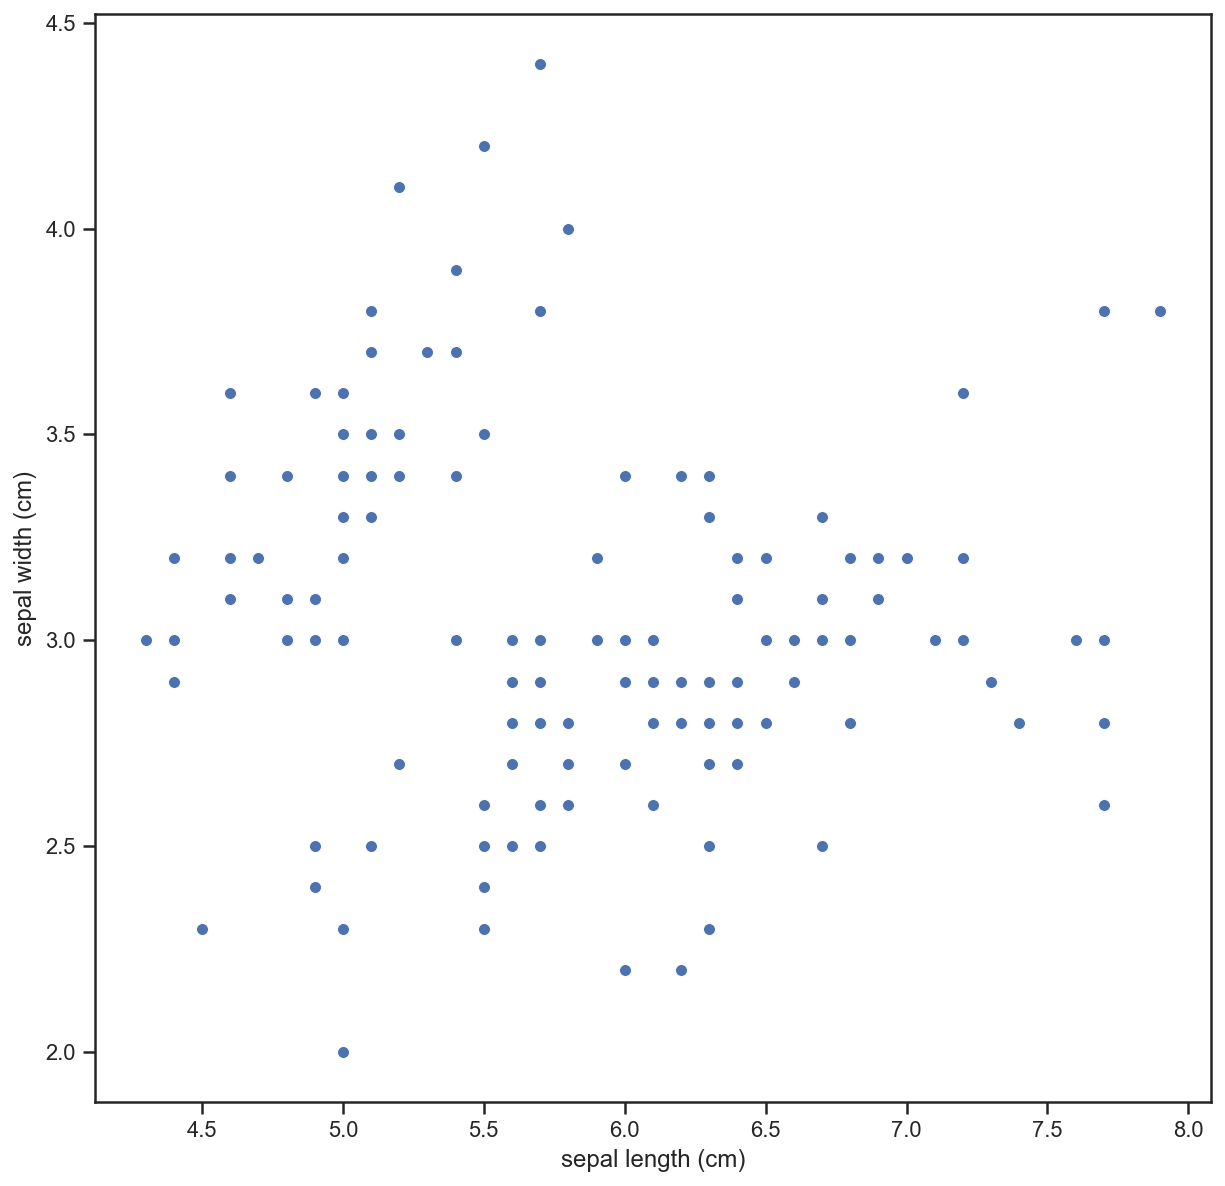

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='sepal length (cm)', y='sepal width (cm)', data=df)

Диаграмма рассеяния для размеров лепестка

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

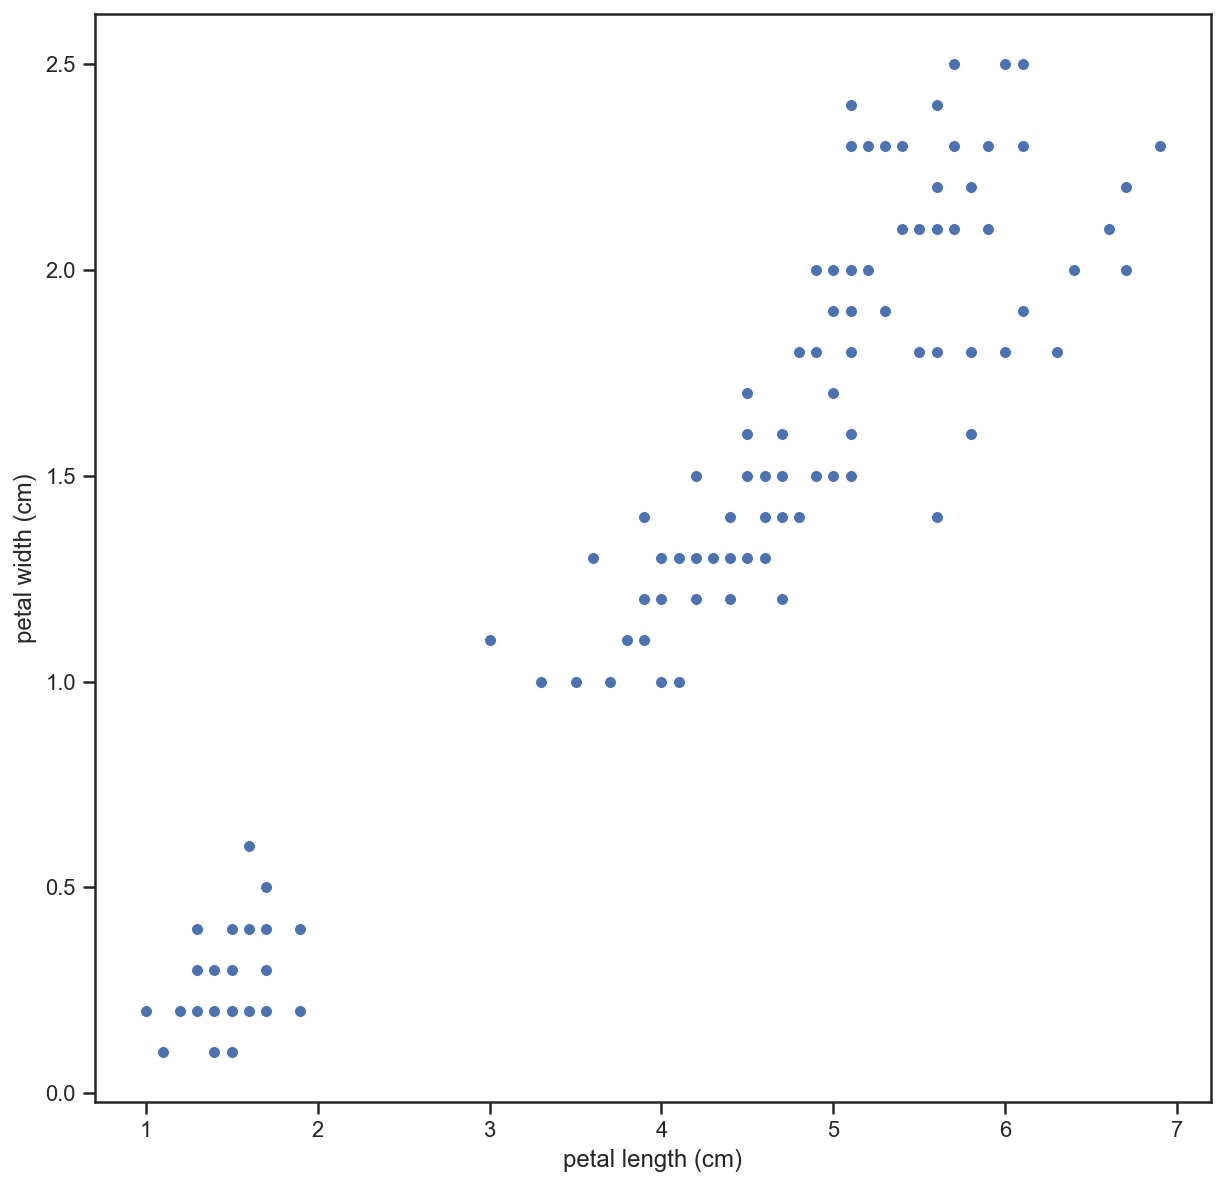

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='petal length (cm)', y='petal width (cm)', data=df)

### Гистограммы

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

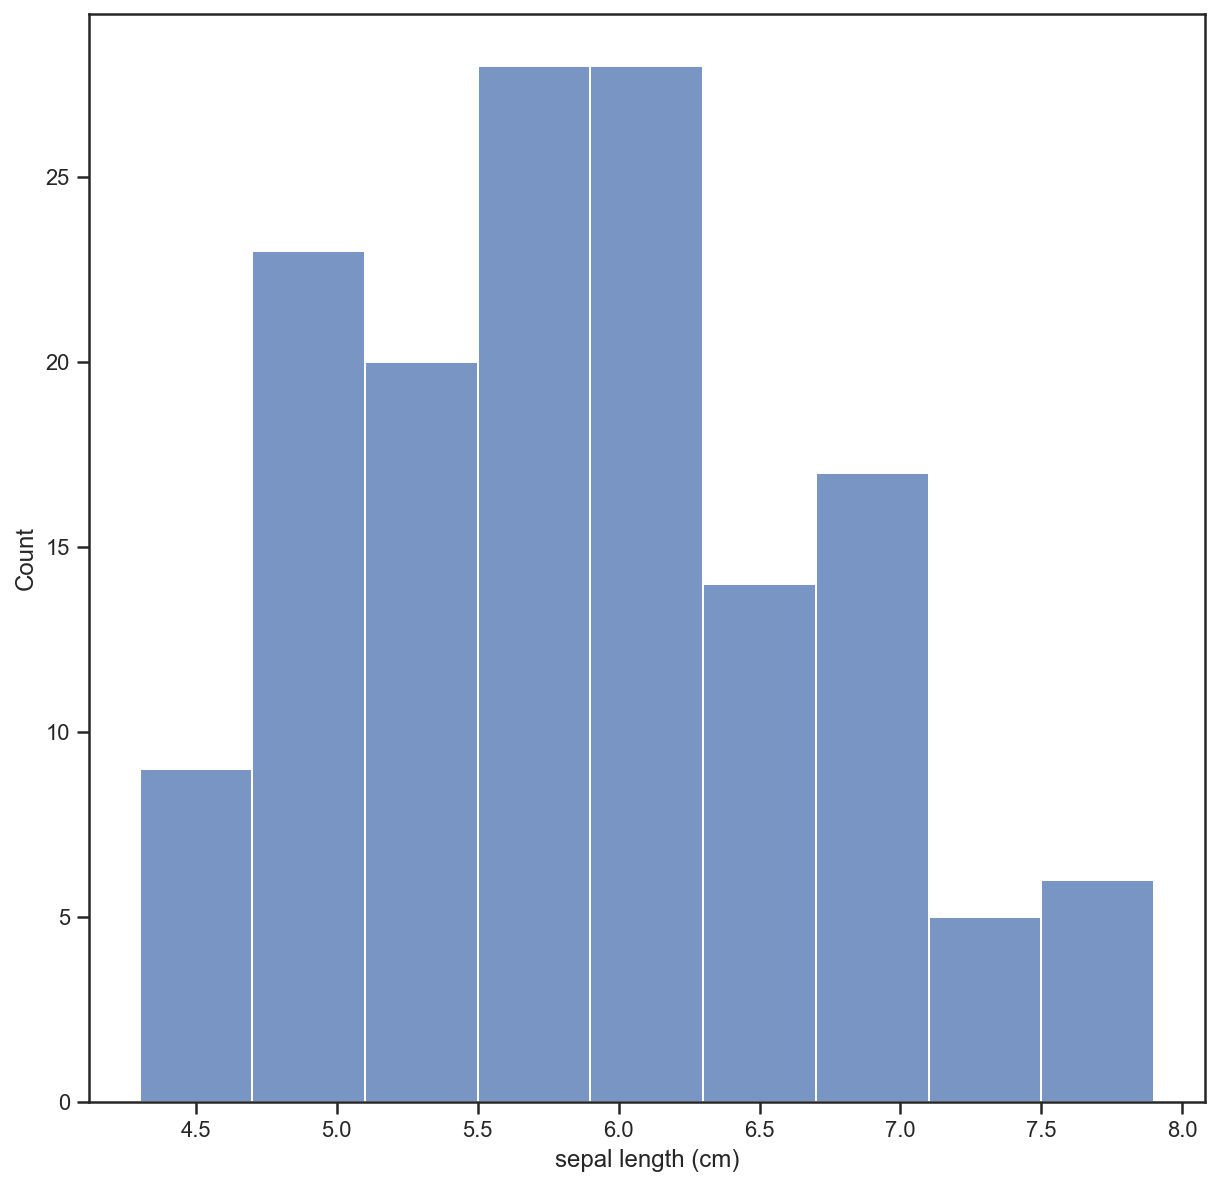

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(df['sepal length (cm)'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='Count'>

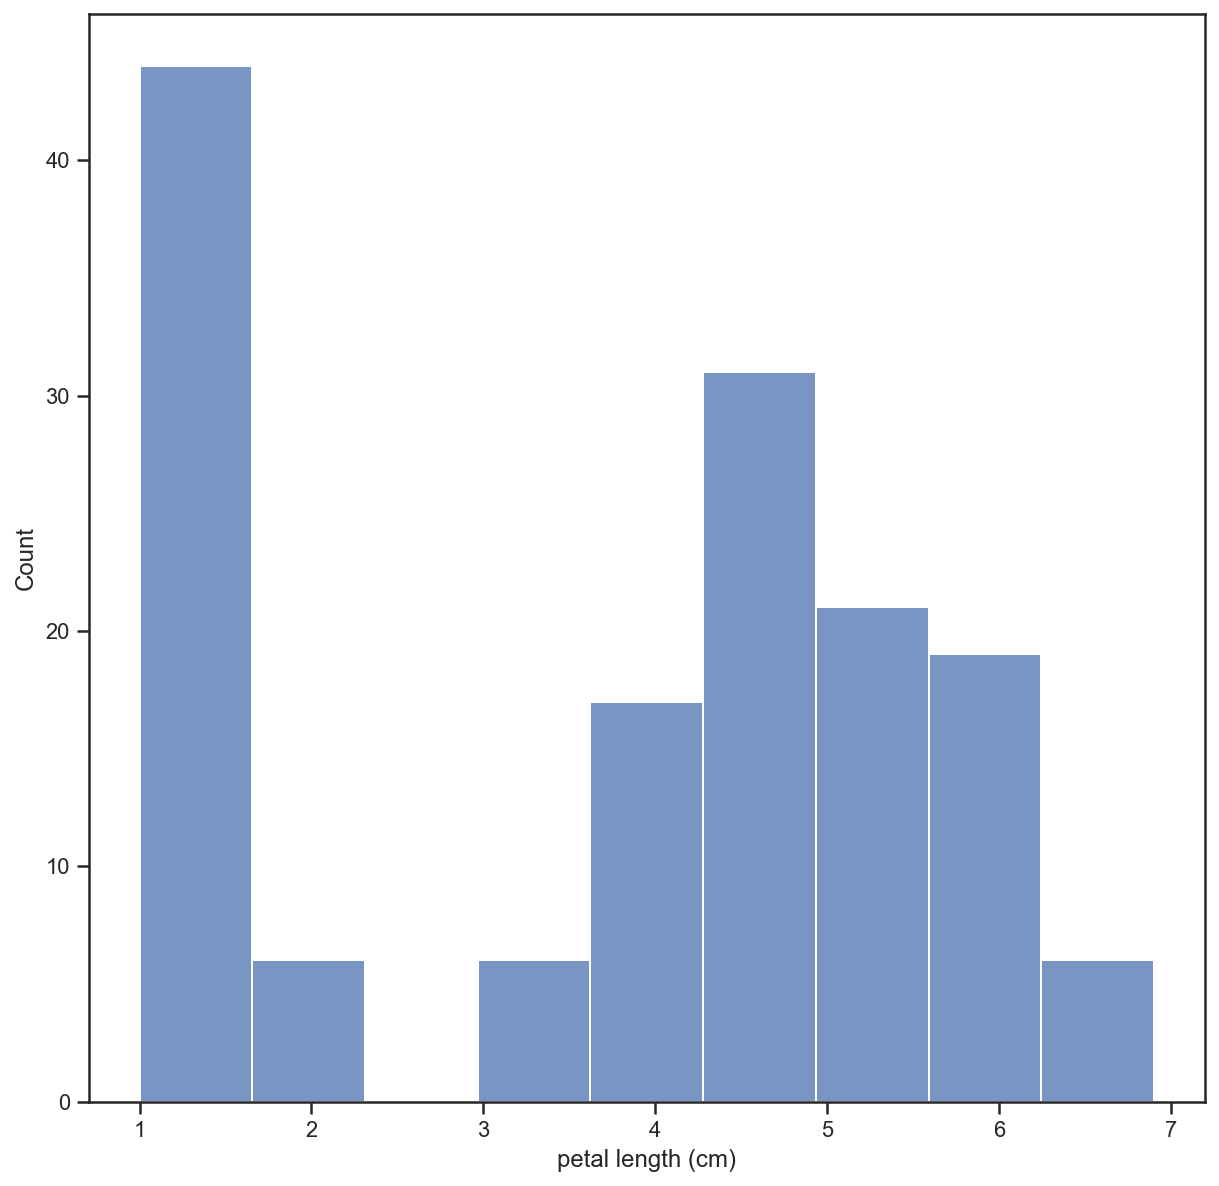

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(df['petal length (cm)'])

### Парные диаграммы

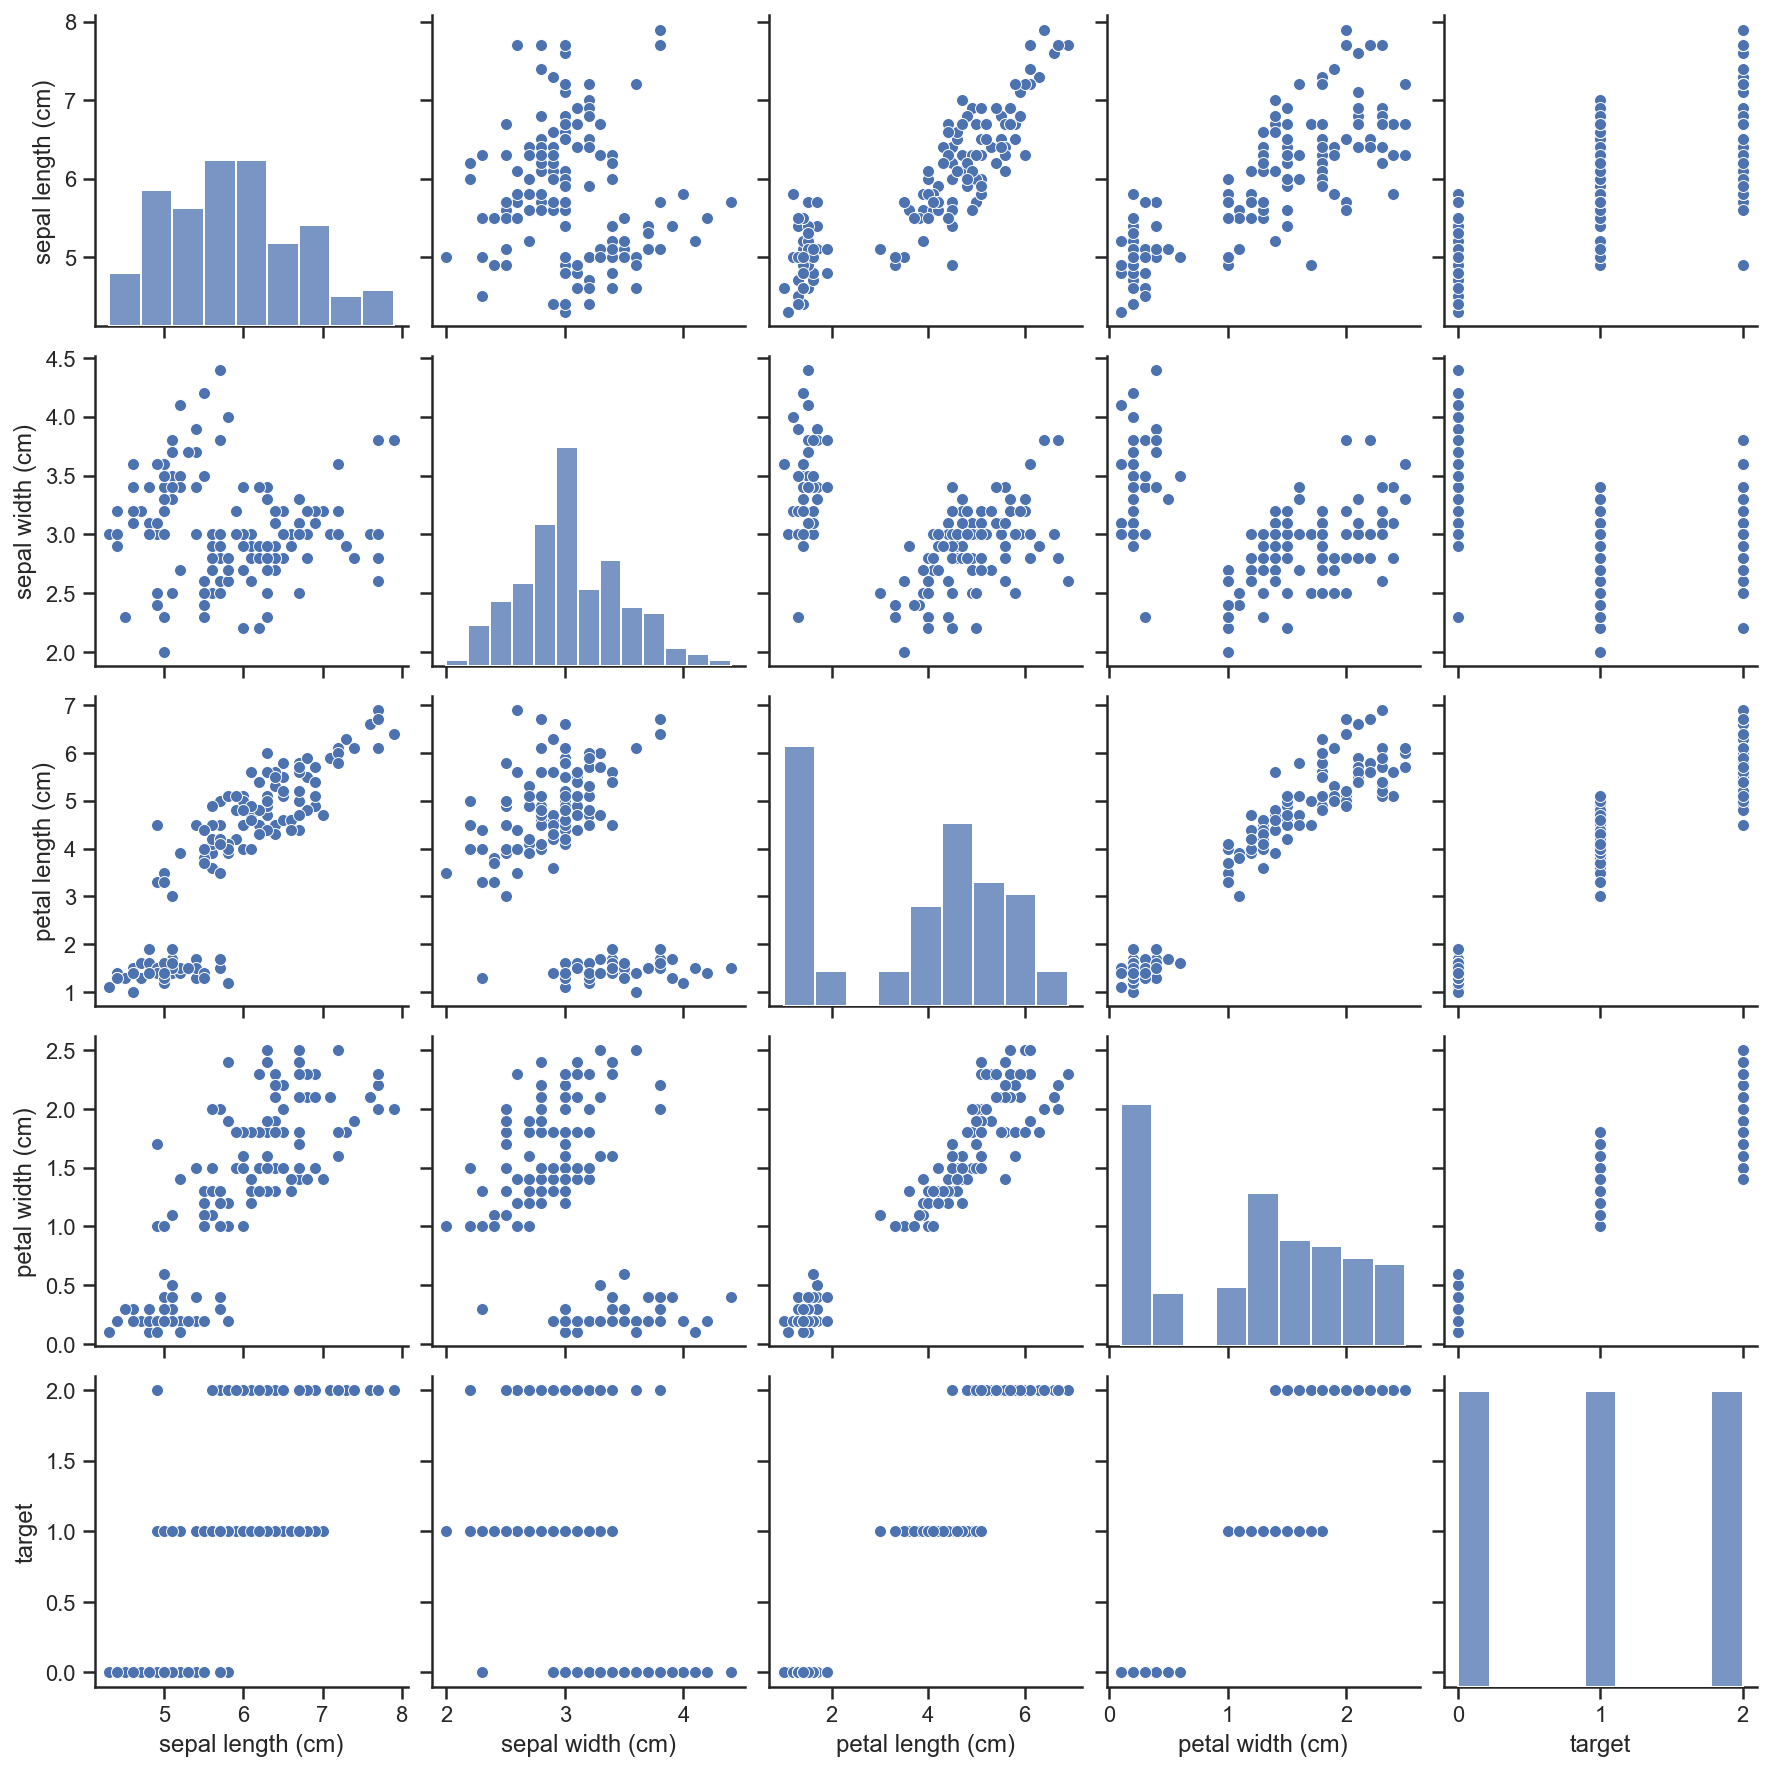

In [41]:
sns.pairplot(df)

### Ящик с усами

<AxesSubplot:xlabel='target'>

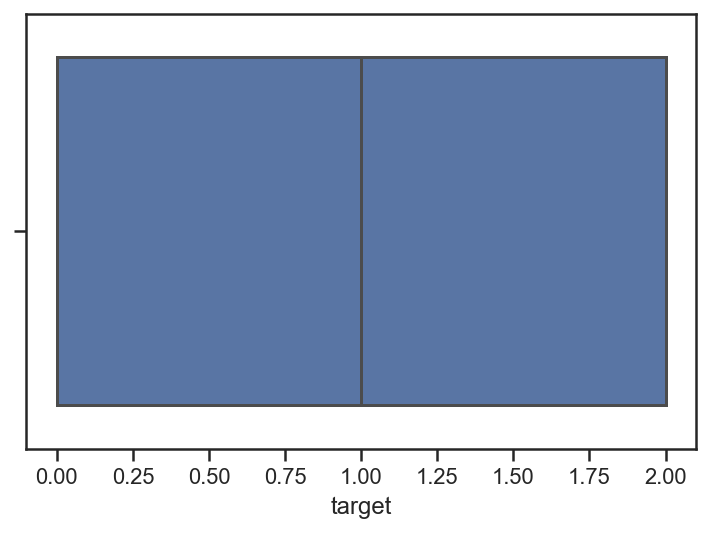

In [42]:
#Вероятность получить определённый вид ириса

sns.boxplot(x=df['target'])

<AxesSubplot:xlabel='petal width (cm)'>

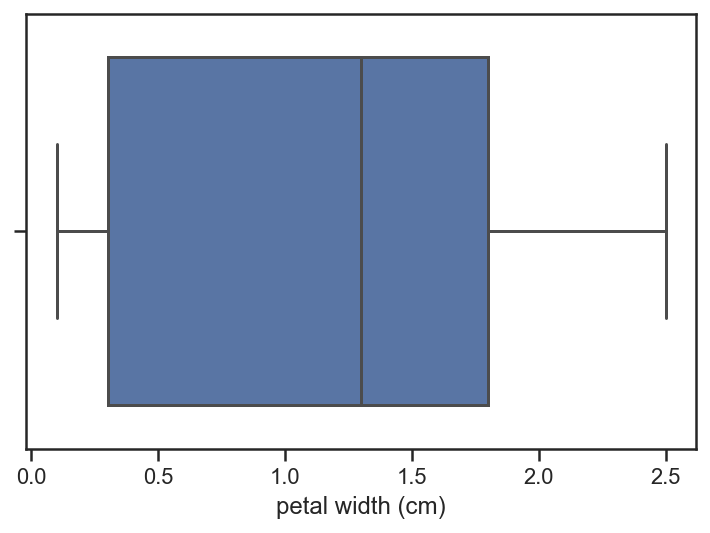

In [43]:
#Вероятность найти лепесток определённой ширины

sns.boxplot(x=df['petal width (cm)'])

### Информация о кореляции признаков
На основе коеффициента кореляции Пирса